In [21]:
seed = 0

import os
import sys

utils_path = os.path.abspath("./utilities/")
sys.path.append(utils_path)

from load_data import load_fullECAI
from evaluation import *
from evaluation import _my_scorer

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

import joblib
from joblib import Parallel, delayed
import shap

from igraph import Graph
import igraph as ig

In [4]:
### LOAD DATA ###
dataset = load_fullECAI()
# Prep data
X = dataset.drop('status', axis=1)
y = dataset.loc[:, 'status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=seed, stratify=y)

In [30]:
def ROC(model_path):
    model_info = joblib.load(model_path)
    y_proba_1 = model_info['y_proba'][:,1]
    
    fig, ax = plt.subplots()
    RocCurveDisplay.from_predictions(y_test, y_proba_1, ax=ax)
    
    model_folder = '/'.join(model_path.split('/')[:-1])
    model_name = model_path.split('/')[-1].split('.')[0]
    fig_name = '{}/{}_ROC.png'.format(model_folder, model_name)
    # imagen eps
    results = plt.savefig(fig_name, bbox_inches='tight', dpi=300, transparent=True)


def shap_graph(model_path):
    return


def heatmap(model_path):
    return

In [5]:
models_paths = ['./results/XGBoost/GridSearchCV_22-03-22_03-27-03/models/best/best_xgb.pkl', 
                './results/Basic/models/RandomForestClassifier.pkl', 
                './results/Basic/models/LogisticRegression.pkl',
                './results/Basic/models/LinearDiscriminantAnalysis.pkl',
                './results/Basic/models/XGBClassifier.pkl']

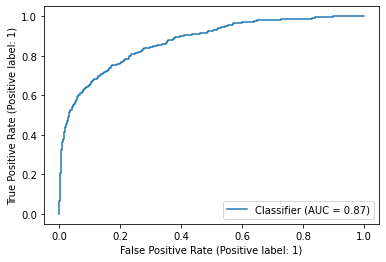

In [29]:
for model_path in models_paths
    ROC(model_path)